In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data = pd.read_csv('winequality-red.csv')

In [8]:
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [55]:
data.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [27]:
correlations = data.corr()['quality'].drop('quality')

In [28]:
correlations

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
Name: quality, dtype: float64

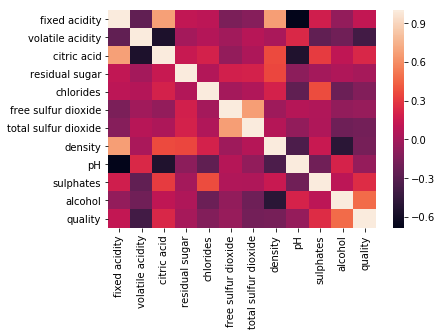

In [29]:
sns.heatmap(data.corr())
plt.show()

In [40]:
def get_features(correlation_threshold):
    abs_corrs = correlations.abs()
    high_correlations = abs_corrs[abs_corrs > correlation_threshold].index.values
    return high_correlations

In [41]:
# taking features with correlation more than 0.05 as input x and quality as target variable y 
features = get_features(0.05) 

In [42]:
features

array(['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH',
       'sulphates', 'alcohol'], dtype=object)

In [44]:
# taking features with correlation more than 0.05 as input x and quality as target variable y 
features = get_features(0.05) 
x = data[features] 
y = data['quality']

In [46]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=3)

In [58]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

array([ 0.01773723, -0.99256049, -0.13962865, -1.59094279,  0.00559652,
       -0.00351973,  0.76859036, -0.43741414,  0.81288805,  0.30148385])

In [59]:
test_pred = regressor.predict(x_test)

In [60]:
test_pred

array([5, 5, 6, 6, 5, 6, 5, 6, 5, 6, 6, 5, 5, 5, 6, 5, 6, 5, 6, 6, 6, 5,
       6, 5, 5, 5, 5, 6, 6, 6, 6, 6, 5, 6, 5, 6, 6, 5, 5, 6, 5, 5, 6, 5,
       5, 5, 6, 5, 5, 5, 5, 5, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6,
       5, 6, 5, 6, 6, 6, 5, 5, 6, 5, 5, 5, 5, 6, 6, 5, 5, 6, 5, 5, 5, 6,
       5, 6, 6, 6, 6, 5, 5, 5, 5, 5, 6, 6, 6, 5, 6, 6, 6, 5, 5, 5, 6, 6,
       6, 5, 6, 6, 5, 5, 5, 5, 6, 6, 5, 5, 5, 5, 6, 6, 6, 6, 5, 5, 5, 5,
       6, 6, 6, 6, 6, 5, 5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 7, 5, 5, 5, 6, 5,
       5, 6, 6, 5, 5, 6, 6, 6, 5, 6, 6, 5, 6, 5, 5, 5, 5, 6, 5, 6, 6, 5,
       6, 5, 5, 6, 7, 5, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 5, 5, 5, 5, 5, 6,
       6, 5, 5, 5, 6, 6, 5, 6, 5, 6, 5, 5, 6, 5, 5, 6, 6, 6, 6, 5, 5, 5,
       5, 5, 6, 5, 6, 5, 6, 5, 5, 5, 6, 6, 5, 5, 5, 5, 5, 6, 5, 5, 6, 6,
       6, 5, 6, 6, 6, 5, 6, 5, 5, 5, 6, 5, 6, 6, 6, 5, 6, 5, 6, 6, 6, 6,
       5, 6, 5, 6, 5, 5, 6, 5, 6, 6, 6, 6, 5, 6, 5, 5, 6, 5, 5, 6, 5, 6,
       5, 5, 5, 6, 5, 7, 5, 5, 6, 6, 5, 6, 6, 6, 6,

In [62]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, test_pred)

0.585

In [63]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier()
model2.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [64]:
predict2 = model2.predict(x_test)

In [65]:
accuracy_score(y_test, predict2)

0.675

In [67]:
from sklearn import preprocessing
x_train_scaled = preprocessing.scale(x_train)
x_test_scaled = preprocessing.scale(x_test)

In [70]:
model3 = RandomForestClassifier()
model3.fit(x_train_scaled, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [71]:
predict3 = model3.predict(x_test)

In [72]:
accuracy_score(y_test, predict3)

0.415